# Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word.

In [2]:
#ANS:-
def highest_frequency_length(string):
    word_count = {}
    for word in string.split():
        word_count[word] = word_count.get(word, 0) + 1

    highest_frequency = max(word_count.values(), default=0)
    highest_frequency_length = max(len(word) for word, count in word_count.items() if count == highest_frequency)

    return highest_frequency_length

# Example
input_string = "Welcome to the Ineuron Data science course"
result = highest_frequency_length(input_string)
print("Length of the word with the highest frequency:", result)


Length of the word with the highest frequency: 7


# Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

In [5]:
from collections import Counter

def is_valid_string(string):
    char_count = Counter(string)

    # Count the frequency of each character
    frequencies = Counter(char_count.values())

    if len(frequencies) == 1:
        # All characters have the same frequency
        return "YES"
    elif len(frequencies) == 2:
        # Check if we can remove one character to make all frequencies the same
        (min_freq, min_freq_count), (max_freq, max_freq_count) = frequencies.items()
        if (min_freq == 1 and min_freq_count == 1) or (max_freq - min_freq == 1 and max_freq_count == 1):
            return "YES"

    return "NO"

# Example usage
input_string = "abc"
result = is_valid_string(input_string)
print(result)


YES


In [7]:
from collections import Counter

def is_valid_string(string):
    char_count = Counter(string)

    # Count the frequency of each character
    frequencies = Counter(char_count.values())

    if len(frequencies) == 1:
        # All characters have the same frequency
        return "YES"
    elif len(frequencies) == 2:
        # Check if we can remove one character to make all frequencies the same
        (min_freq, min_freq_count), (max_freq, max_freq_count) = frequencies.items()
        if (min_freq == 1 and min_freq_count == 1) or (max_freq - min_freq == 1 and max_freq_count == 1):
            return "YES"

    return "NO"

# Example usage
input_string = "abccc"
result = is_valid_string(input_string)
print(result)


NO


# Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

In [1]:
#Ans:-
import pandas as pd
import json
import requests
import warnings
warnings.filterwarnings("ignore")

# Fetch JSON data from URL
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Convert JSON to DataFrame
df = pd.DataFrame(data["pokemon"])

# Convert DataFrame to Excel file
df.to_excel('pokemon_pokedex.xlsx', index=False)

#don't know why thia code is showing me error


ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Biuni/PokemonGO-Pokedex/master/pokedex.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002D2EC28B160>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

# Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json

In [11]:
#ans:-
import requests
import json
import csv

def download_and_convert_to_csv(url):
    # Download the data from the provided link
    response = requests.get(url)
    data = response.json()

    # Define the desired attributes for the output data
    output_attributes = [
        "name",
        "id",
        "nametype",
        "recclass",
        "mass (g)",
        "year",
        "reclat",
        "reclong"
    ]

    # Open a CSV file for writing with UTF-8 encoding
    csv_filename = "earth_meteorites.csv"
    with open(csv_filename, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=output_attributes)

        # Write the header row
        writer.writeheader()

        # Write the data rows
        for entry in data:
            formatted_entry = {
                "name": entry.get("name", ""),
                "id": entry.get("id", ""),
                "nametype": entry.get("nametype", ""),
                "recclass": entry.get("recclass", ""),
                "mass (g)": entry.get("mass (g)", ""),
                "year": entry.get("year", ""),
                "reclat": entry.get("reclat", ""),
                "reclong": entry.get("reclong", "")
            }
            writer.writerow(formatted_entry)

    return csv_filename

# Example usage
url = "https://data.nasa.gov/resource/y77d-th95.json"
csv_file = download_and_convert_to_csv(url)
print("Data has been converted and saved to:", csv_file)


Data has been converted and saved to: earth_meteorites.csv


# Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes 

In [1]:
import requests
import json
from bs4 import BeautifulSoup

api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Check if the request was successful (status code 200)
if response.status_code == 200:
   
    data = response.json()

    # Extract the show name and display it
    show_name = data["name"]
    print("Show Name:", show_name)

    # Extract the premiered date and display it
    premiered = data["premiered"]
    print("Premiered:", premiered)

    # Extract and format the episode details
    episodes = data["_embedded"]["episodes"]
    print("Episodes:")
    for episode in episodes:
        episode_id = episode["id"]
        episode_url = episode["url"]
        episode_name = episode["name"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_type = episode["type"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_rating = episode["rating"]["average"]
        episode_summary = episode["summary"]
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        # Clean the summary by removing HTML tags
        summary_text = BeautifulSoup(episode_summary, "html.parser").get_text()

        print(f"Episode ID: {episode_id}")
        print(f"URL: {episode_url}")
        print(f"Name: {episode_name}")
        print(f"Season: {episode_season}")
        print(f"Number: {episode_number}")
        print(f"Type: {episode_type}")
        print(f"Airdate: {episode_airdate}")
        print(f"Airtime: {episode_airtime}")
        print(f"Runtime: {episode_runtime} minutes")
        print(f"Average Rating: {episode_rating}")
        print(f"Summary: {summary_text}")
        print(f"Medium Image Link: {episode_image_medium}")
        print(f"Original Image Link: {episode_image_original}")
        print("-----------------------------")

else:
    # Request was not successful
    print("Error:", response.status_code)


Show Name: Westworld
Premiered: 2016-10-02
Episodes:
Episode ID: 869671
URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68 minutes
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
-----------------------------
Episode ID: 911201
URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Name: Chestnut
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60 m

# Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('earth_meteorites.csv')
df.head()

,name,id,nametype,recclass,mass (g),year,reclat,reclong
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000


In [4]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

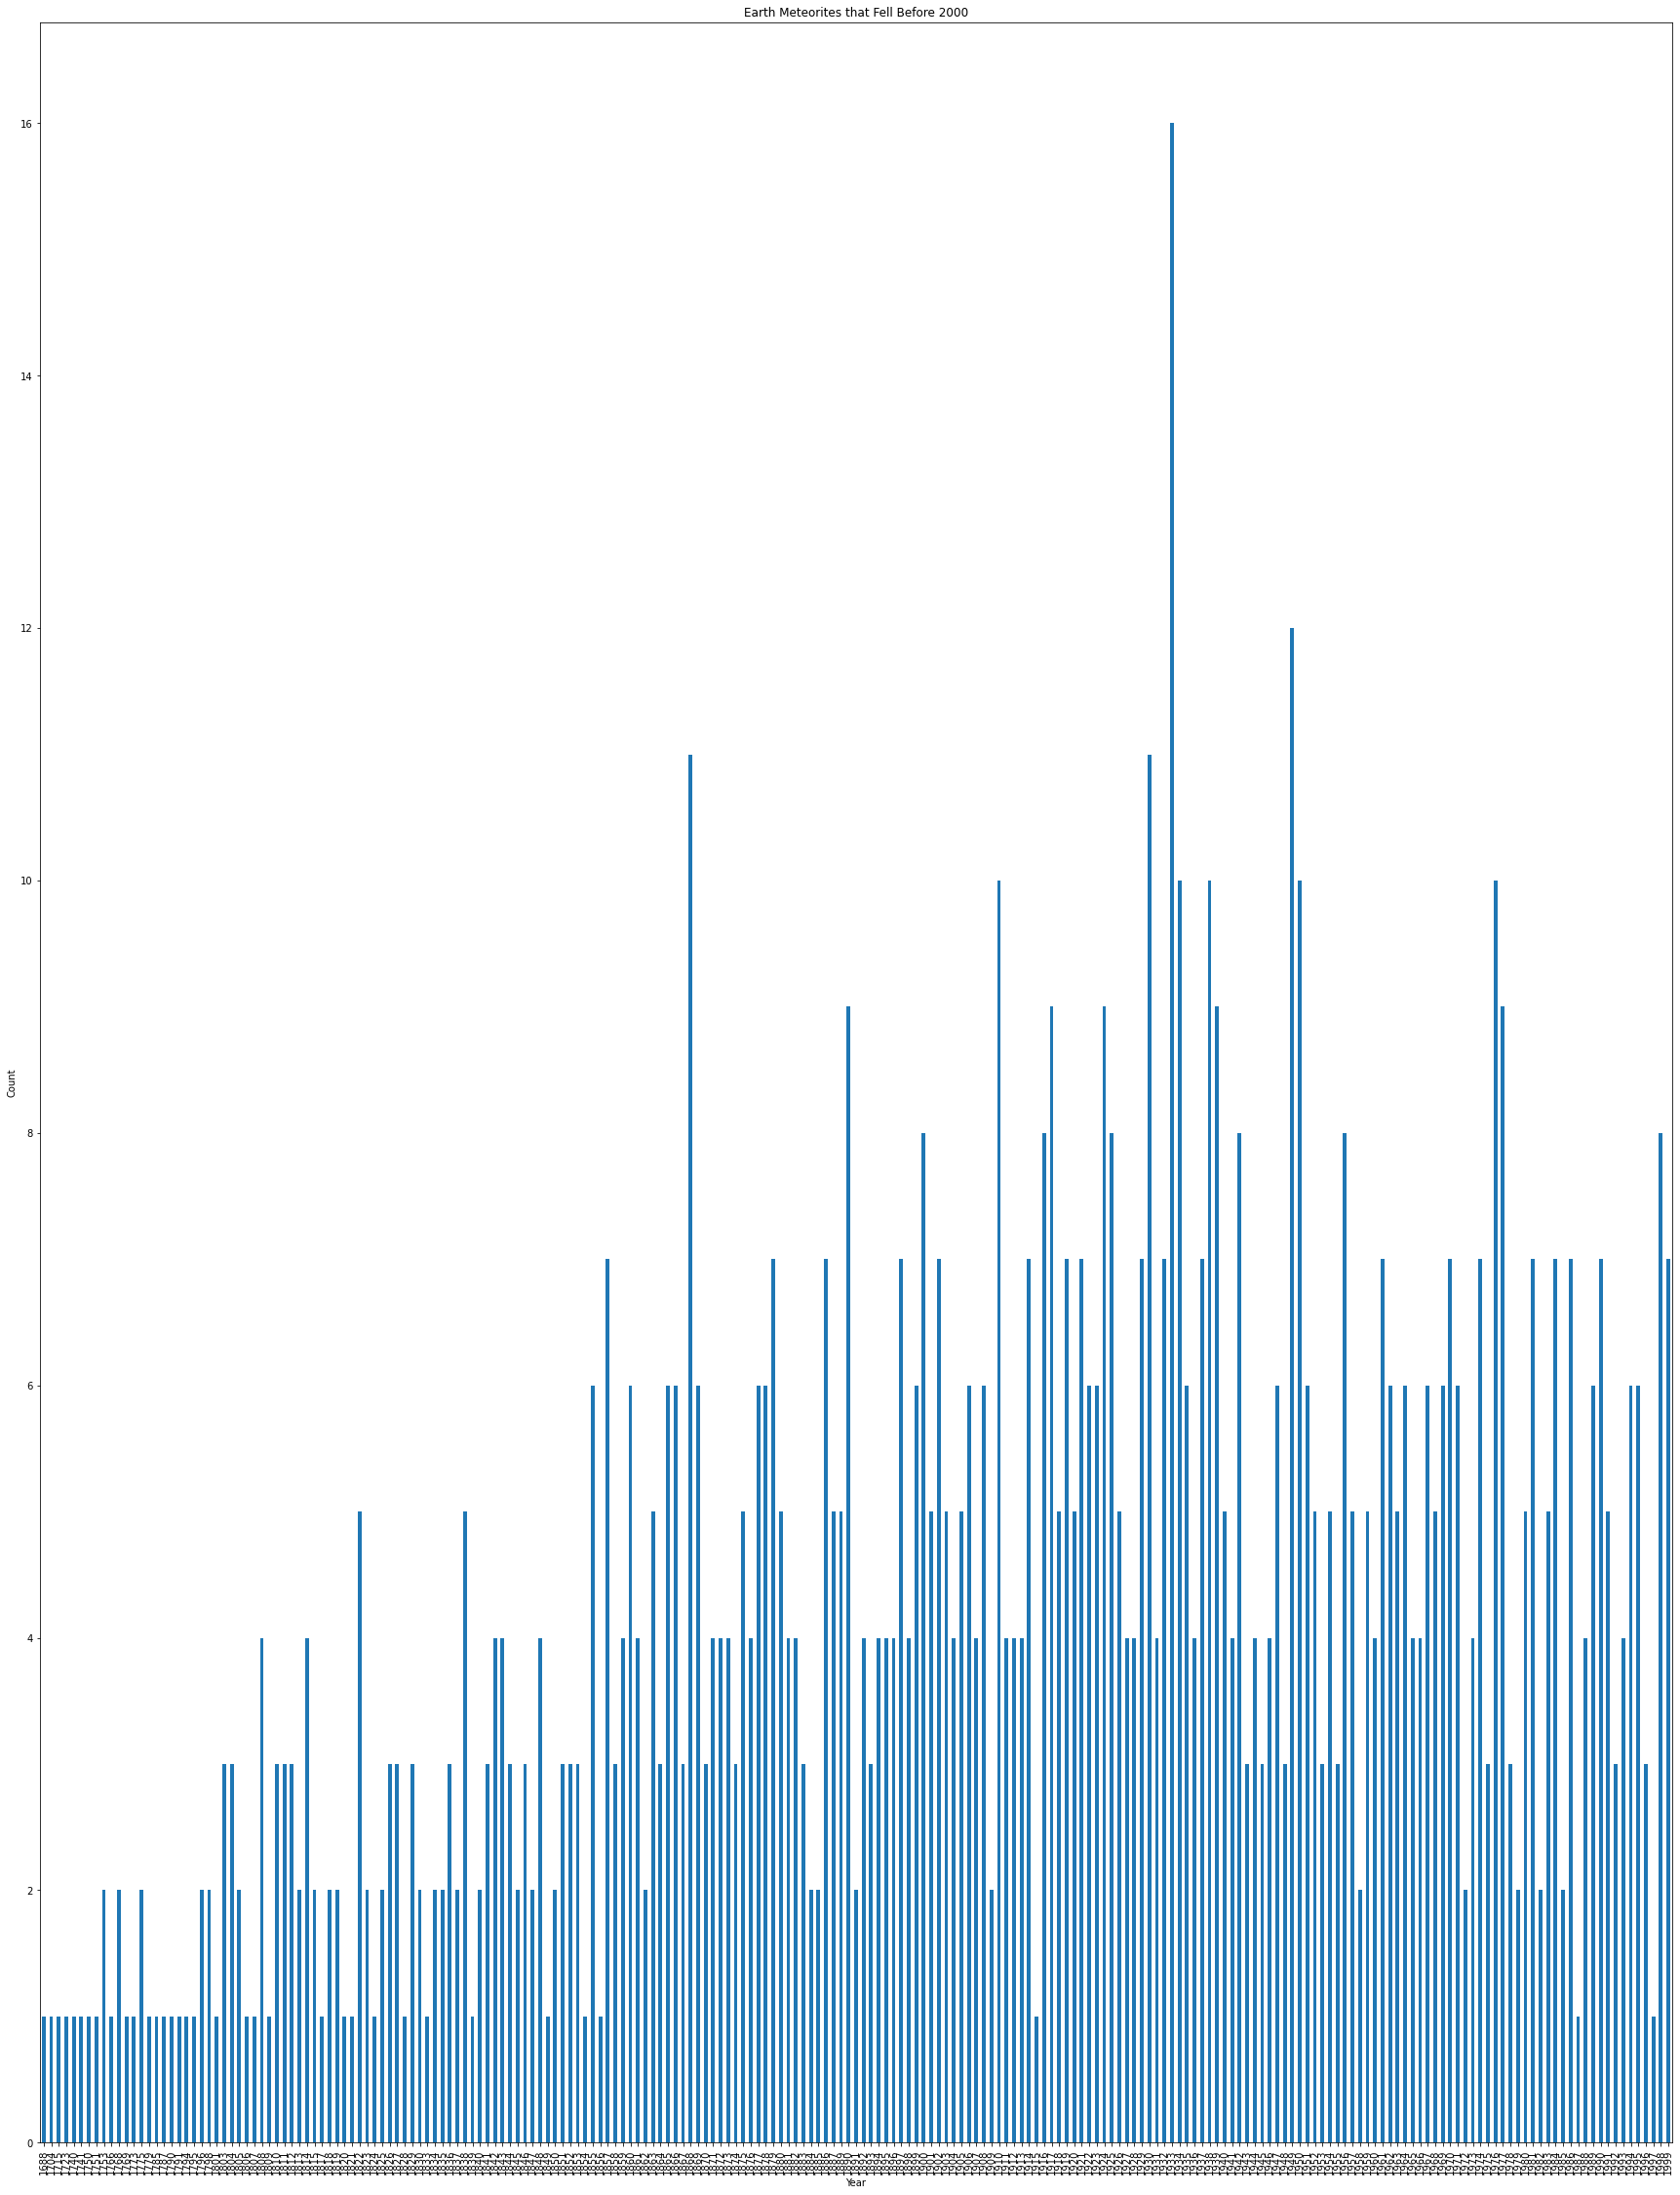

In [13]:
earth_meteorites_before_2000 = df[(df['reclat'] != 0) & (df['year'] < '2000-01-01')]
plt.figure(figsize=(30, 40))

earth_meteorites_before_2000['year'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Earth Meteorites that Fell Before 2000')
plt.show()


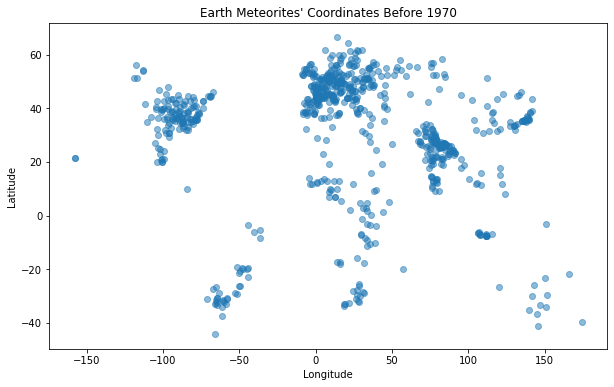

In [6]:
earth_meteorites_before_1970 = df[(df['reclat'] != 0) & (df['year'] < '1970-01-01')]

# Plot the scatter plot of Earth meteorites' coordinates that fell before 1970
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites\' Coordinates Before 1970')
plt.show()

In [9]:
earth_meteorites_greater_than_10000kg = df[(df['reclat'] != 0) & (df['mass (g)'] > 10000)]

# Check if any Earth meteorites with mass greater than 10000kg exist
if not earth_meteorites_greater_than_10000kg.empty:
    # Plot the count of Earth meteorites with mass greater than 10000kg
    plt.figure(figsize=(10, 6))
    earth_meteorites_greater_than_10000kg['year'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Earth Meteorites with Mass > 10000kg')
    plt.show()
else:
    print('No Earth meteorites found with mass greater than 10000kg.')







No Earth meteorites found with mass greater than 10000kg.


# Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

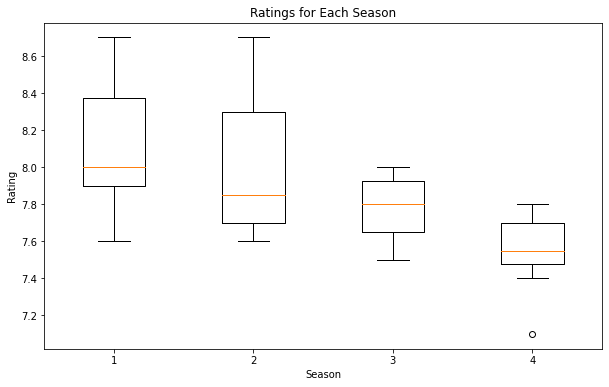

In [11]:
import requests
import json
import matplotlib.pyplot as plt

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()

    # Extract the episodes data
    episodes = data["_embedded"]["episodes"]

    # Get all the overall ratings for each season and compare the ratings for all the seasons
    season_ratings = {}
    for episode in episodes:
        season = episode["season"]
        rating = episode["rating"]["average"]
        if season not in season_ratings:
            season_ratings[season] = []
        season_ratings[season].append(rating)

    # Plot the ratings for each season
    seasons = sorted(season_ratings.keys())
    ratings = [season_ratings[season] for season in seasons]

    plt.figure(figsize=(10, 6))
    plt.boxplot(ratings)
    plt.xticks(range(1, len(seasons) + 1), seasons)
    plt.xlabel('Season')
    plt.ylabel('Rating')
    plt.title('Ratings for Each Season')
    plt.show()

   

In [13]:
 # Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = []
for season in seasons:
    episodes_in_season = [episode["name"] for episode in episodes if episode["season"] == season]
    average_rating = sum([episode["rating"]["average"] for episode in episodes if episode["season"] == season]) / len(episodes_in_season)
    if average_rating > 8:
        high_rated_episodes.extend(episodes_in_season)

    print("High Rated Episodes (Average Rating > 8) for Every Season:")
    print(high_rated_episodes)

   

High Rated Episodes (Average Rating > 8) for Every Season:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind']
High Rated Episodes (Average Rating > 8) for Every Season:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind']
High Rated Episodes (Average Rating > 8) for Every Season:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind']
High Rated Episodes (Average Rating > 8) for Every Season:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind']


In [14]:
 # Get all the episode names that aired before May 2019
episodes_before_2019 = [episode["name"] for episode in episodes if episode["airdate"] < "2019-05-01"]

print("Episodes Aired Before May 2019:")
print(episodes_before_2019)

    


Episodes Aired Before May 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']


In [15]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for season in seasons:
    episodes_in_season = [episode for episode in episodes if episode["season"] == season]
    highest_rated_episode = max(episodes_in_season, key=lambda x: x["rating"]["average"])
    lowest_rated_episode = min(episodes_in_season, key=lambda x: x["rating"]["average"])
    highest_rated_episodes[season] = highest_rated_episode["name"]
    lowest_rated_episodes[season] = lowest_rated_episode["name"]

print("Episode with Highest and Lowest Rating for Each Season:")
for season in seasons:
    print(f"Season {season} - Highest Rated Episode: {highest_rated_episodes[season]}")
    print(f"Season {season} - Lowest Rated Episode: {lowest_rated_episodes[season]}")
    print("--------------------")

   

Episode with Highest and Lowest Rating for Each Season:
Season 1 - Highest Rated Episode: The Bicameral Mind
Season 1 - Lowest Rated Episode: The Stray
--------------------
Season 2 - Highest Rated Episode: Kiksuya
Season 2 - Lowest Rated Episode: Akane No Mai
--------------------
Season 3 - Highest Rated Episode: Parce Domine
Season 3 - Lowest Rated Episode: Decoherence
--------------------
Season 4 - Highest Rated Episode: Zhuangzi
Season 4 - Lowest Rated Episode: The Auguries
--------------------


In [19]:
 # Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = {}
for season in seasons:
    episodes_in_season = [episode for episode in episodes if episode["season"] == season]
    episode_summary = most_popular_episode["summary"]
    most_popular_episodes[season] = episode_summary

    # Print the summary for the most popular episode in each season
    print("Summary for the Most Popular Episode in Each Season:")
    for season, summary in most_popular_episodes.items():
        print(f"Season {season}: {summary}")
        print("--------------------")
   

Summary for the Most Popular Episode in Each Season:
Season 1: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
--------------------
Summary for the Most Popular Episode in Each Season:
Season 1: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
--------------------
Season 2: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
--------------------
Summary for the Most Popular Episode in Each Season:
Season 1: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape 